# Computer Vision and Internet of Things

## Task 2 : Color Identification in Images

## Description : Implement an image color detector which identifies all the colors in an image or video

## Author : Shivam Deshpande

### Overview
#### The task is to extract and identify the colors in the image provided to the code
#### We will read the colors from an image and display them using pie chart

#### 3 important libraries used 
#### 1.KMeans machine learning library from sklearn package. This is required for extracting the colors from given image
  
#### 2.cv2. This is required for image manipulation
  
#### 3.matplotlib library. This is used for plotting the color information in the form of pie chart

## Installing opencv module

In [2]:
!pip install opencv-python

## Importing necessary libraries

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter

%matplotlib inline

## Reading an image in opencv

The image get's imported in the notebook as numpy array

We first read the image using imread() function of cv2

Then we display the image using imshow() function of pyplot

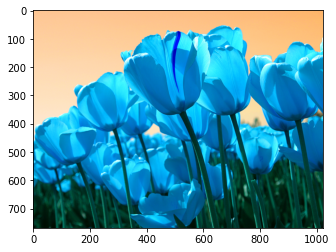

In [7]:
image = cv2.imread('Tulips.jpg')
plt.imshow(image)

The colors in this image are looking erroneous

The reason is that the OpenCV reads any image in the Blue Green Red (BGR) fashion

Thus to view an actual image, we'll have to convert this BGR rendering into the RGB one

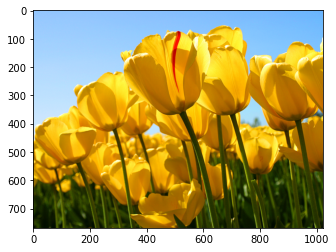

In [8]:
# The cvtColor method in the cv2 helps us to convert the image rendering to different color space
# BGR2RGB changes the rendering from BGR to RGB

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Now we are able to see the actual image

## Identifying the image properties

In [9]:
# Image is imported as numpy array
type(image)

numpy.ndarray

In [10]:
# shape of the array (image)
image.shape

(768, 1024, 3)

The size of the image is 768 x 1024 pixels

3 --> Image is the combination of 3 colors i.e Red, Blue and Green

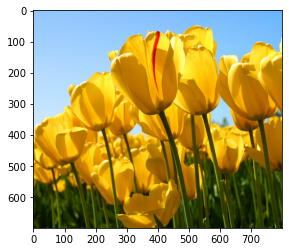

In [11]:
# We can resize the image to the size we want 
# resize function in cv2 does that for us

resized_image = cv2.resize(image, (800,700)) # width and height of image that we want
plt.imshow(resized_image)

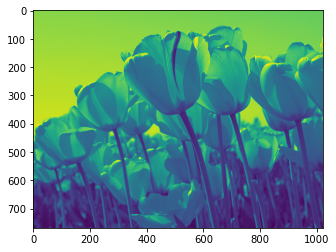

In [12]:
# We can convert the image rendering to GRAY as well for black and white image
# This is similar to what we did with BGR to convert to RGB

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

## Color Identification in Images

### 1. HEX Conversion

We are going to display the colors in our image in the form of pie chart

We will convert the colors from RGB to hex so that we can use them as labels for our pie chart



In [13]:
# A function is defined that will return hex values for RGB colors in the image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
# {:02x} displays the hex values for respecive colors

### 2. Reading the image in RGB Color space

As discussed above, first we'll have to convert the obtained image's color space to RGB (from the default BGR)


In [14]:
# The function is defined which will
# 1.Get the image from path
# 2.read using cv2
# 3.convert to RGB space
# 4.return the image

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

### 3. Getting colors from the image

Now we are going to fit our entire code in one function 

We call this function and it will extract the colors from an image and display it in the form of a pie chart

We define a function "get_colors" and we pass the follwing three arguments 

         1.image: The image of which the colors we are going to extract
         2.no_of_colors: How many colors we want to extract from this image
         3.show_chart: This variable will decide whether we want to display the obtained colors in the form of pie chart

In [15]:
# function Steps
#    1.Resize the image to 800 x 700
#    2.KMeans needs the input to be of only 2 dimensions, so we have reshaped the image data
#    3.KMeans creates clusters based on the supplied count. Here we have passed the number of colors that we want to extract
#      KMeans will create clusters of colors
#    4.KMeans will fit the numbers and predict on the given image and stores it in the variable "labels"
#    5.Counter is used to get count of all the labels
#    6.The centers of created clusters by KMeans will give us the colors
#    7.To get the colors in the order as per the labels, center_colors is iterated over values of counts
#      On the other hand, it also divides every count by 255
#    8.We get hex colors using RGB2HEX function and iterating over counts
#    9.As we had divided by 255 in step 7, iterating ordered_colors again over counts will multiply by 255 
#    10.Finally if the value of boolean show_chart is True, then the obtained colors will be plotted in pie chart using 
#       matplotlib and hex_colors is passed as a parameter for pie chart



def get_colors(image, no_of_colors, show_chart):
    modified_image = cv2.resize(image, (800,700), interpolation=cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = no_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if(show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        
    return rgb_colors

### 4. Function Call

[array([154.06259173, 205.04843236, 252.88991126]),
 array([44.53031586, 54.1434622 ,  1.14254526]),
 array([194.76931156, 127.09222414,   0.7709938 ]),
 array([253.41434069, 227.99656583,  71.0540455 ]),
 array([145.89759335,  94.35348655,   1.98958474]),
 array([246.93076828, 185.31069243,   9.01334736])]

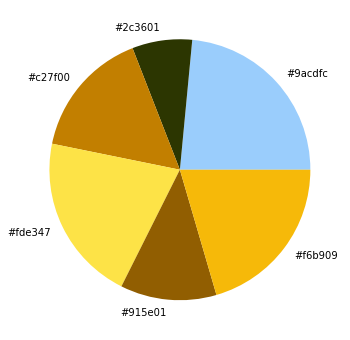

In [16]:
# Finally we just call the function get_colors to return the pie chart showing the colors present in the image
get_colors(get_image('Tulips.jpg'), 6, True)

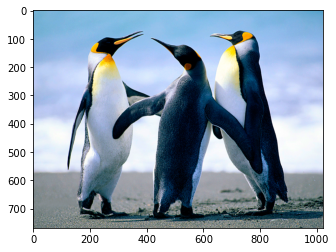

In [17]:
# Applying the algorithm on another image
image2 = get_image('Penguins.jpg')
plt.imshow(image2)

[array([ 1.39944236, 11.99252569, 27.78451013]),
 array([140.11996534, 185.44839168, 227.24894372]),
 array([ 87.52207875, 109.20427683, 116.39759969]),
 array([16.31745077, 55.02759957, 75.31774035]),
 array([188.15985906, 205.10738456, 240.85063185]),
 array([235.86512113, 242.04129733, 247.82096772]),
 array([238.62230732, 183.70799426,  37.25993298]),
 array([141.77436819, 149.49989107, 155.78509804])]

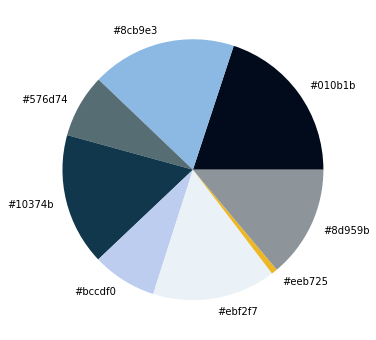

In [18]:
get_colors(image2, 8, True)

## Conclusion : We used KMeans Clustering algorithm to extract colors from the image provided and we have displayed the identified colors in the form of pie chart

## Thank You